# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
#plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')
sns.set_palette('viridis')
%matplotlib inline



## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [ ]:
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

In [ ]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

In [ ]:
# Aggregate data by year (e.g., sum, average, etc.)
# Here, we're using mean, but you can change it to sum, median etc.
df_aggregated = df.groupby('Year').agg({
    'Global Average Temperature (°C)': 'mean',
    'CO2 Concentration (ppm)': 'mean',
    'Sea Level Rise (mm)': 'mean',
    'Arctic Ice Area (million km²)': 'mean'
}).reset_index()

# Filter the data to span exactly 124 years 
df_aggregated = df_aggregated[(df_aggregated['Year'] >= 1900) & (df_aggregated['Year'] <= 2023)]

#Check that the data contains 124 years
print(df_aggregated)


In [ ]:
# Visualize one of the time series, like Global Average Temperature

plt.plot(df_aggregated['Year'], df_aggregated['Global Average Temperature (°C)'])
plt.xlabel('Year')
plt.ylabel('Global Average Temperature (°C)')
plt.title('Global Average Temperature Over 124 Years')
#plt.grid(True)
plt.show()

## 2. Univariate Analysis

Analyze each climate variable independently.

In [ ]:
#list columns to analyze
uni_analysis_columns = list(df.columns.difference(['Year']))

print(uni_analysis_columns)

# Descriptive Statistics
print("\nDescriptive Statistics:")
stats = df[uni_analysis_columns].describe().T
stats["Range"] = stats["max"] - stats["min"]
print(stats)



Univariate Analysis for Arctic Ice Area (million km²) 
count    124.000000
mean       9.000886
std        0.037547
min        8.893453
25%        8.978851
50%        8.998274
75%        9.027985
max        9.101611
Name: Arctic Ice Area (million km²), dtype: float64
Creating Univariate plots ...


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


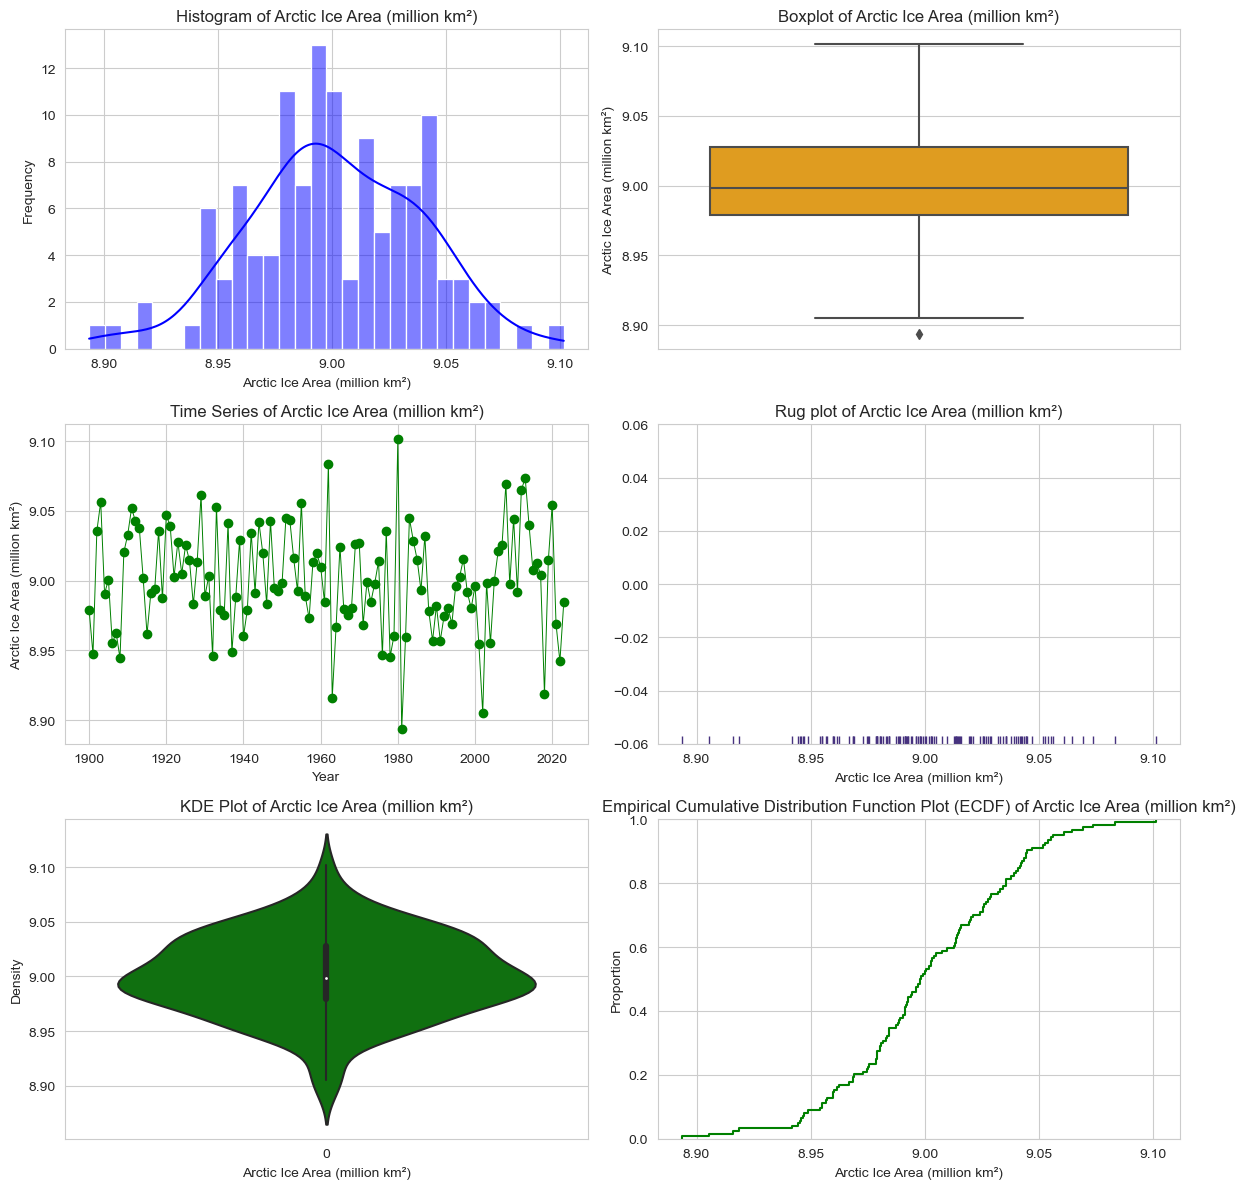

Univariate Analysis for CO2 Concentration (ppm) 
count    124.000000
mean     350.028626
std        0.456535
min      348.642249
25%      349.691692
50%      350.022334
75%      350.367023
max      351.003294
Name: CO2 Concentration (ppm), dtype: float64
Creating Univariate plots ...


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


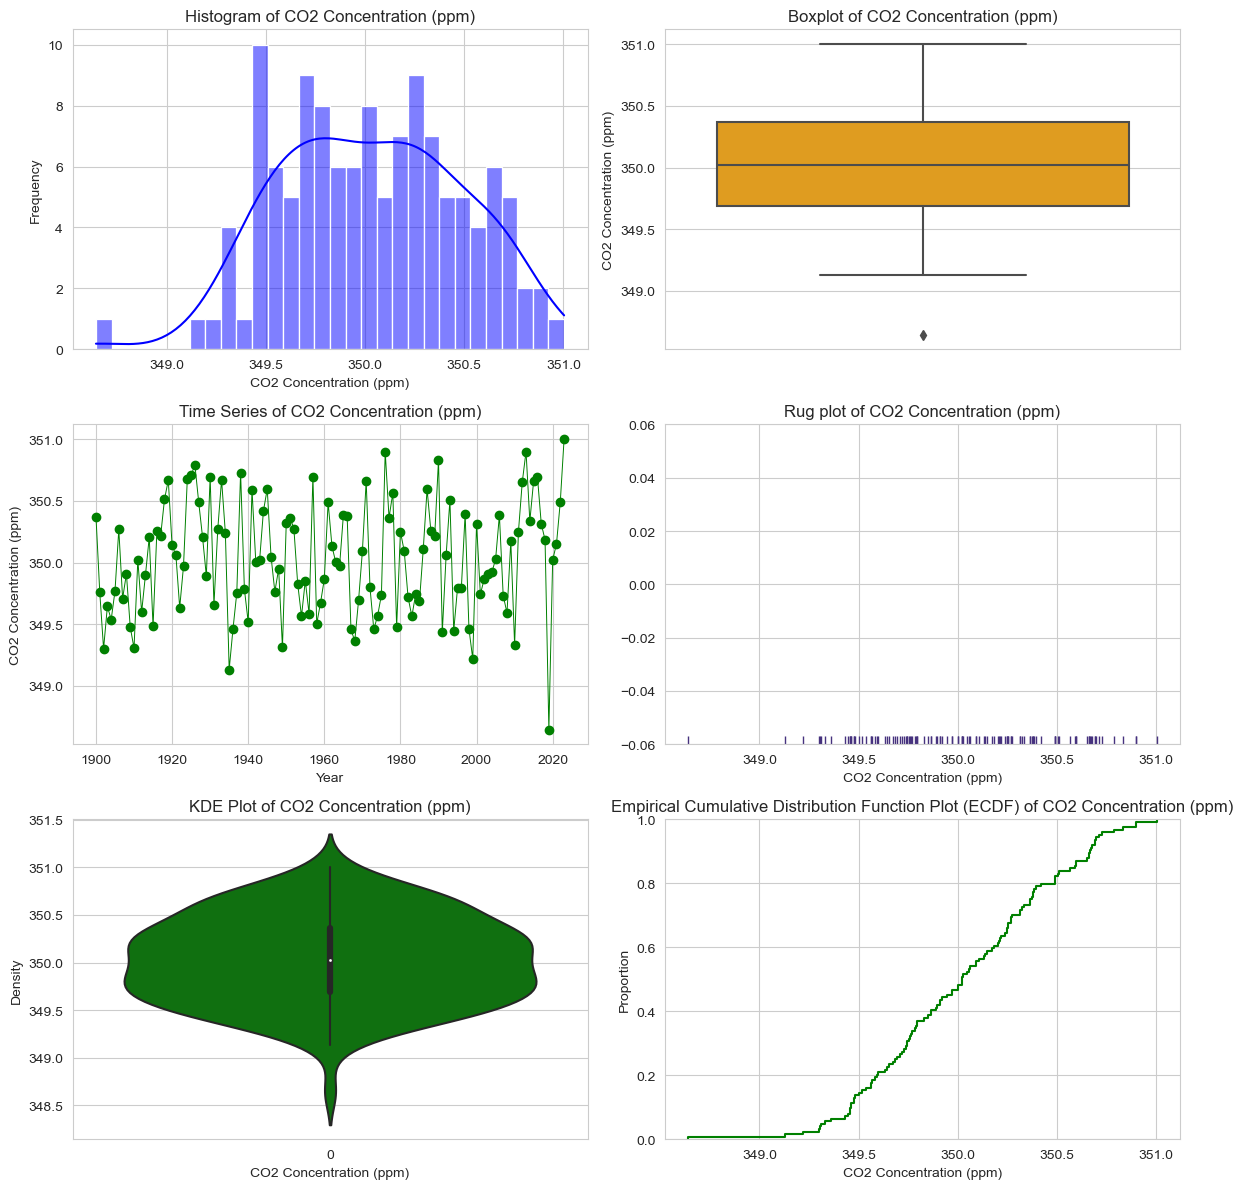

Univariate Analysis for Global Average Temperature (°C) 
count    124.000000
mean      14.499538
std        0.009960
min       14.474559
25%       14.492782
50%       14.499496
75%       14.504872
max       14.527762
Name: Global Average Temperature (°C), dtype: float64
Creating Univariate plots ...


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


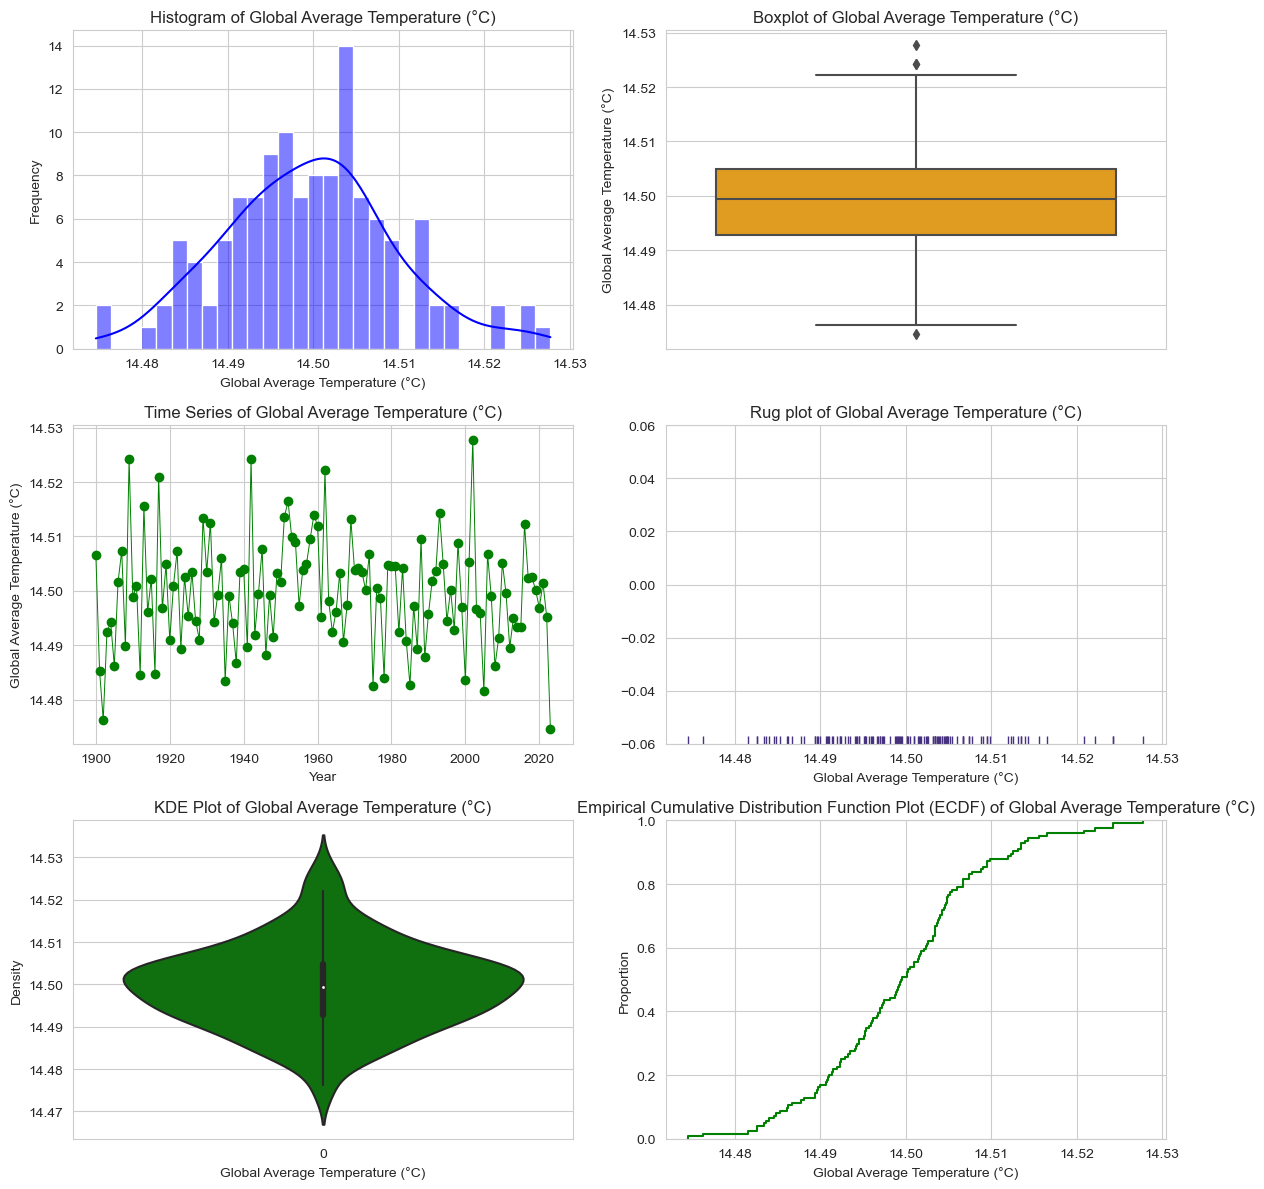

Univariate Analysis for Sea Level Rise (mm) 
count    124.000000
mean     149.988859
std        1.032095
min      148.051748
25%      149.207437
50%      149.918062
75%      150.560328
max      152.671944
Name: Sea Level Rise (mm), dtype: float64
Creating Univariate plots ...


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


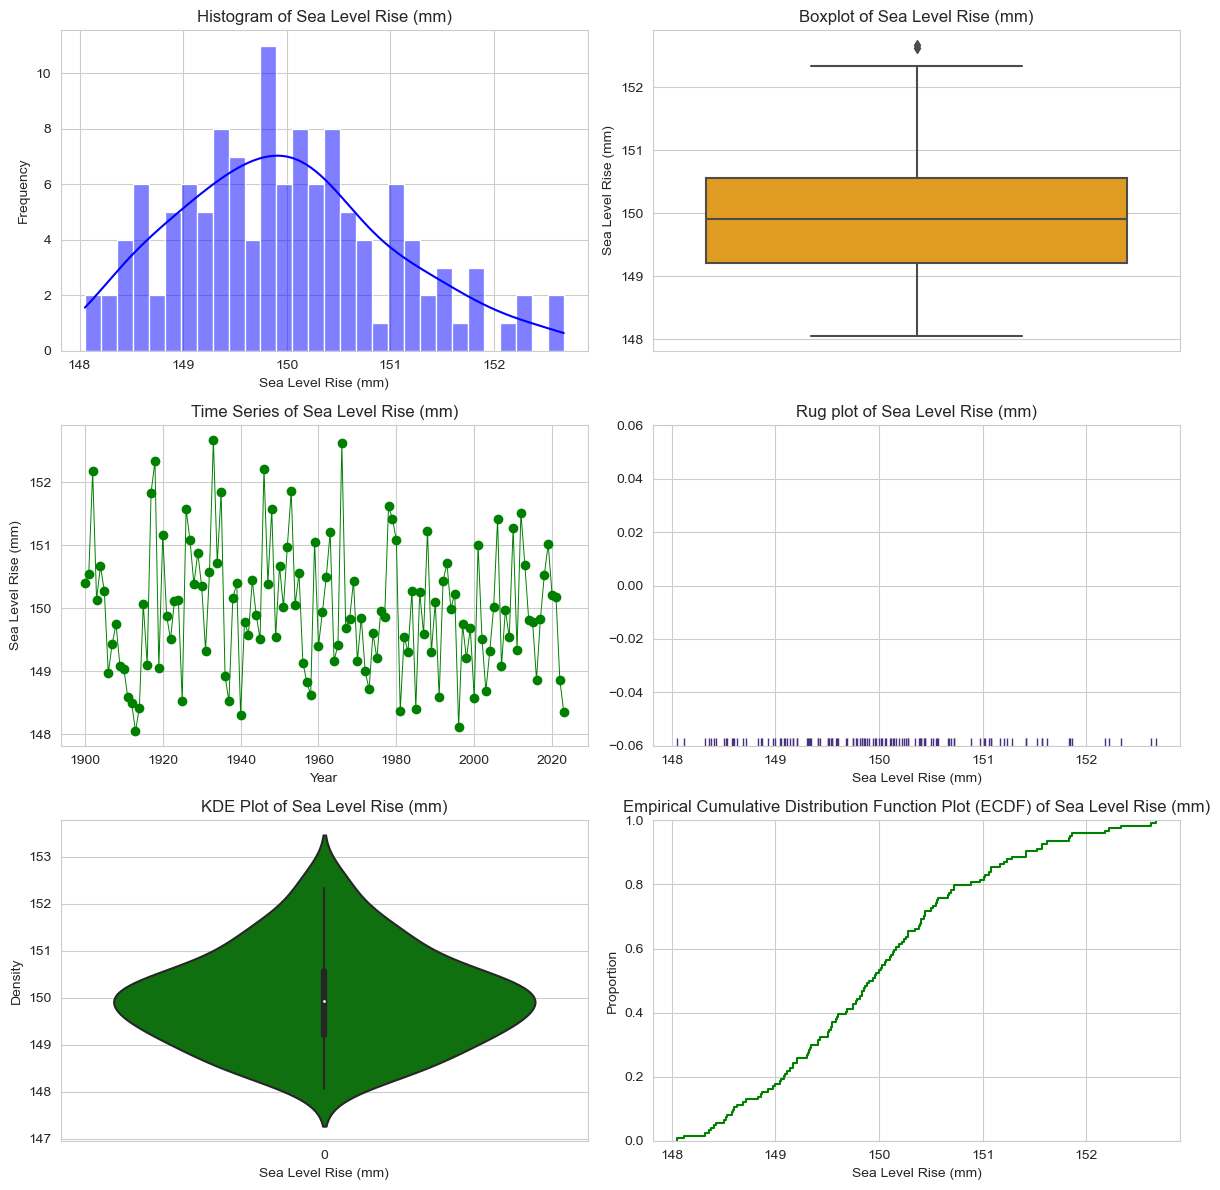

In [16]:
# Visualizations
def univariate_analysis(df, variables):
    for variable in variables:
        print(f"Univariate Analysis for {variable} ")
        print(df[variable].describe())
        print("Creating Univariate plots ...")

        plt.figure(figsize=(12, 12))
        
        # Histogram
        plt.subplot(3, 2, 1)
        sns.histplot(df[variable], kde=True, color='blue', bins=30)
        plt.title(f"Histogram of {variable}")
        plt.xlabel(variable)
        plt.ylabel("Frequency")
        
        # Box Plot
        plt.subplot(3, 2, 2)
        sns.boxplot(y=df[variable], color='orange')
        plt.title(f"Boxplot of {variable}")
        plt.ylabel(variable)
        
        # Time Series Plot
        plt.subplot(3, 2, 3)
        plt.plot(df['Year'], df[variable], marker='o', color='green', linewidth=0.7)
        plt.title(f"Time Series of {variable}")
        plt.xlabel("Year")
        plt.ylabel(variable)
        plt.grid(True)
        
        # Rug Plot
        plt.subplot(3, 2, 4)
        sns.rugplot(df[variable],)
        plt.title(f"Rug plot of {variable}")
        plt.xlabel(variable)
        plt.grid(True)


        # Violin Plot
        plt.subplot(3, 2, 5)
        sns.violinplot(df[variable],color='green')
        plt.title(f'KDE Plot of {variable}')
        plt.xlabel(variable)
        plt.ylabel('Density')

        # ECDF plot
        plt.subplot(3, 2, 6)
        sns.ecdfplot(df[variable], color='green')
        plt.title(f'Empirical Cumulative Distribution Function Plot (ECDF) of {variable}')
        plt.xlabel(variable)
        plt.ylabel('Proportion')
        
        # Display plots
        plt.tight_layout()
        plt.show()


univariate_analysis(df_aggregated, uni_analysis_columns)

## Insights and conclusion drawn from Univariate Analysis
- Arctic Ice Area (million km²)
    - 